In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

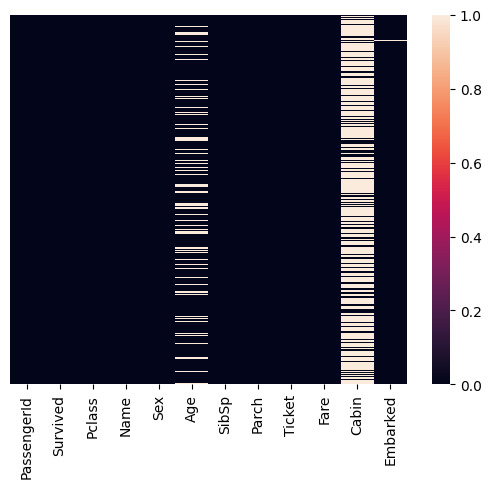

In [13]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= True, cmap= "rocket")

<Axes: >

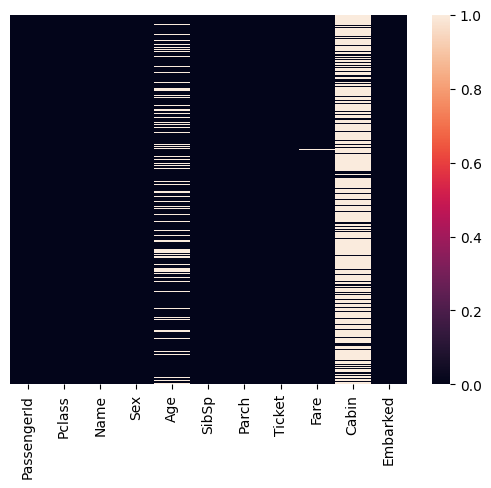

In [14]:
sns.heatmap(test.isnull(), yticklabels= False, cbar= True, cmap= "rocket")

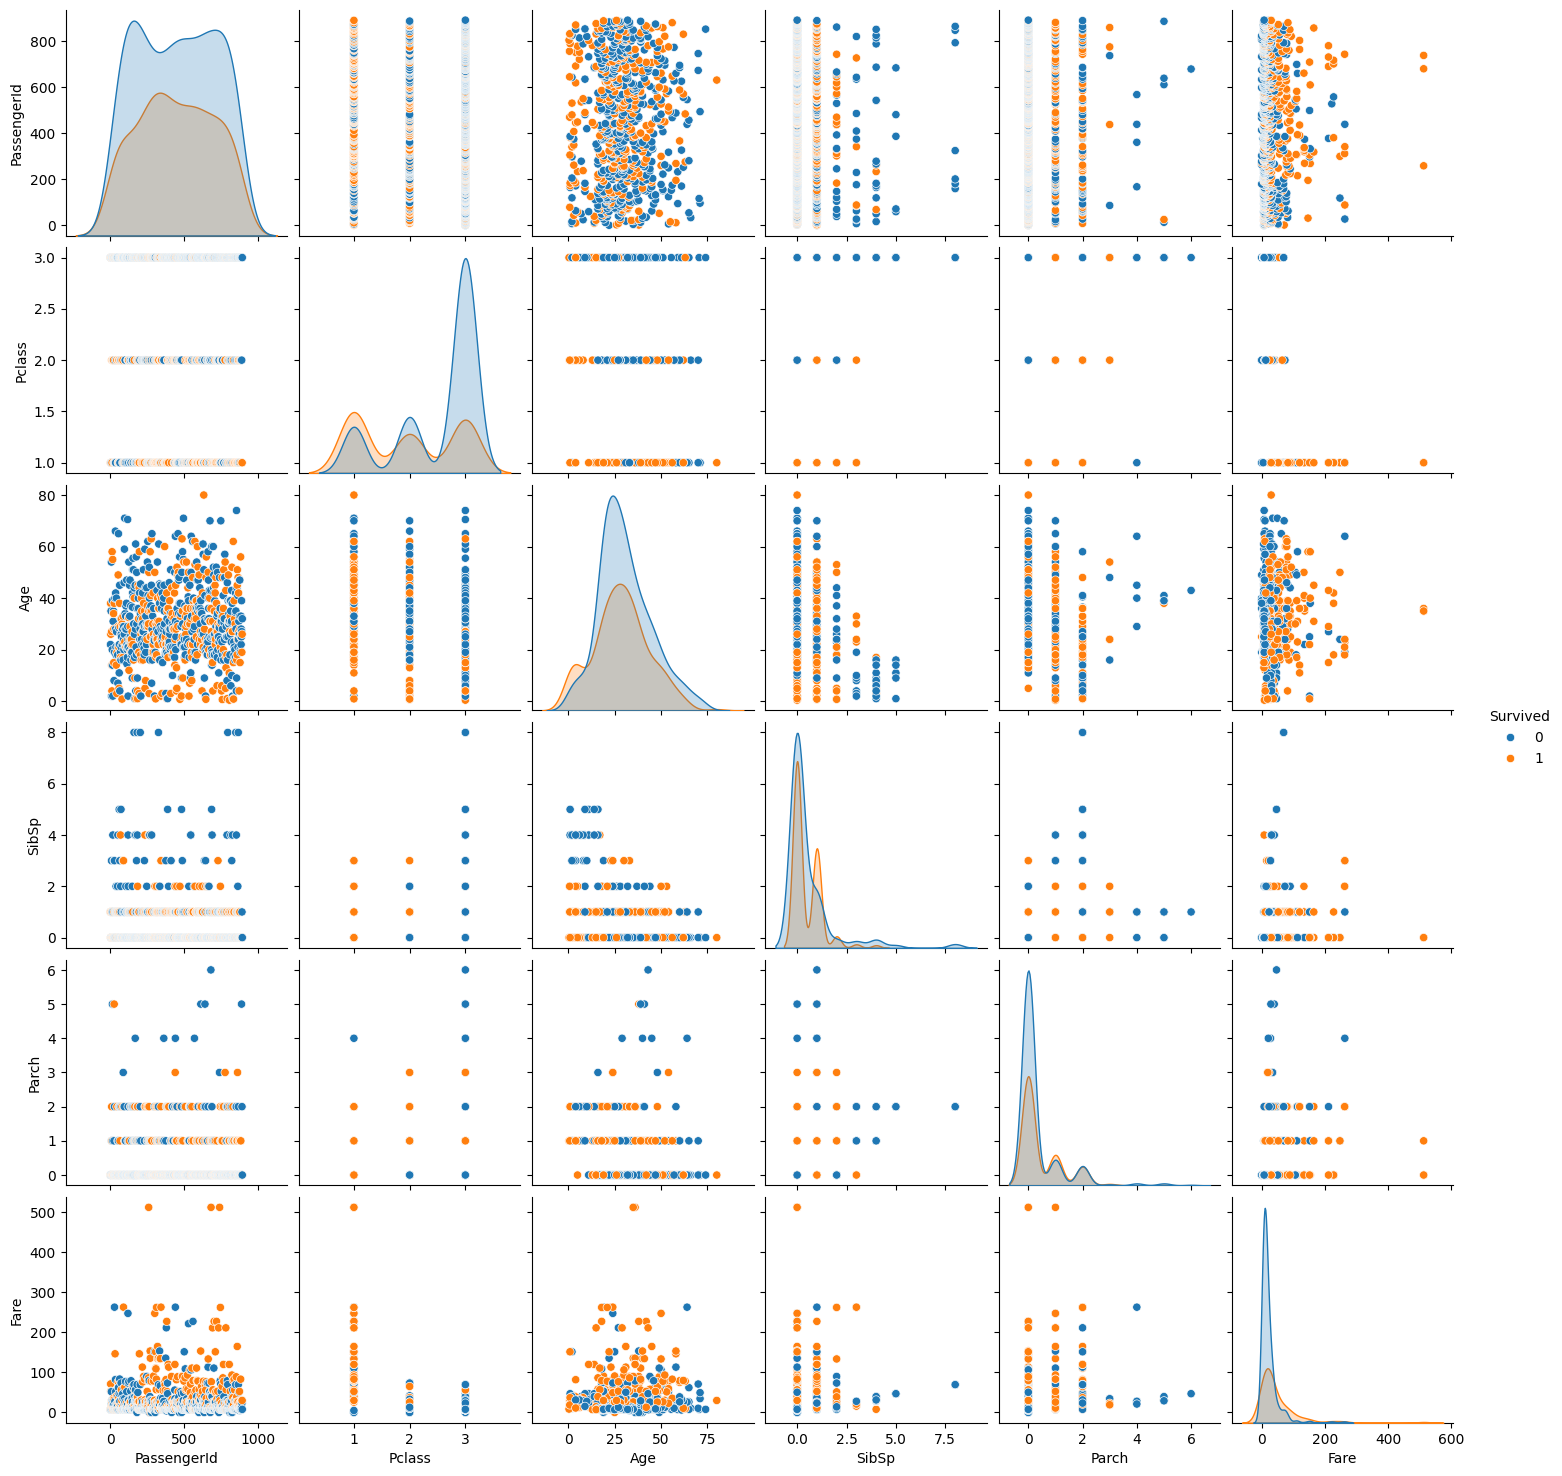

In [15]:
sns.pairplot(train, hue= "Survived")

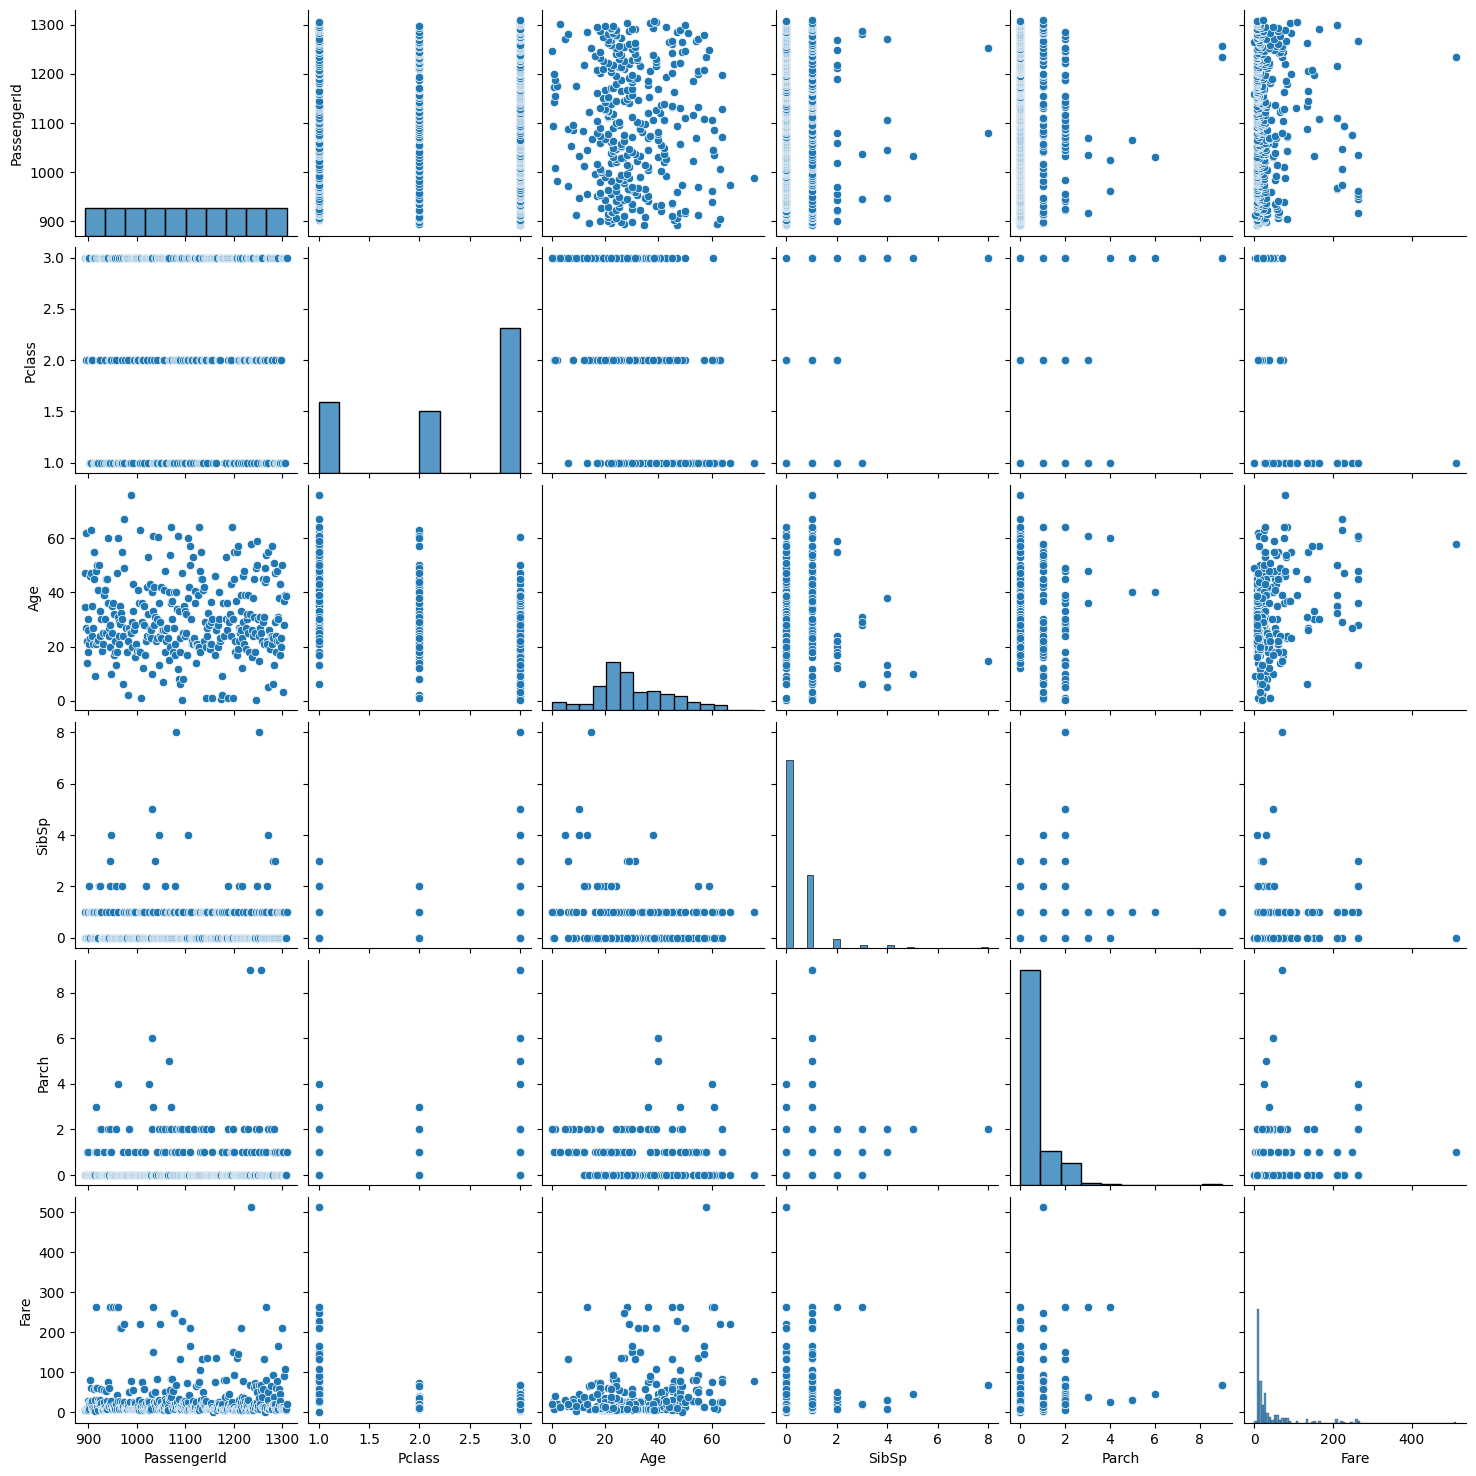

In [16]:
sns.pairplot(test)

In [17]:
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\1568919536.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= train, x= "Survived", palette= "magma")


<Axes: xlabel='Survived', ylabel='count'>

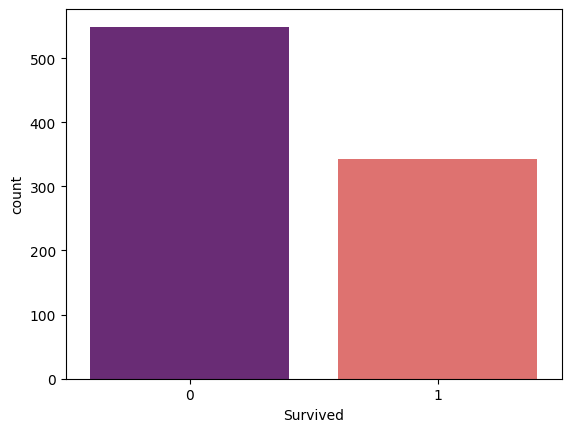

In [18]:
sns.countplot(data= train, x= "Survived", palette= "magma")

In [19]:
train.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

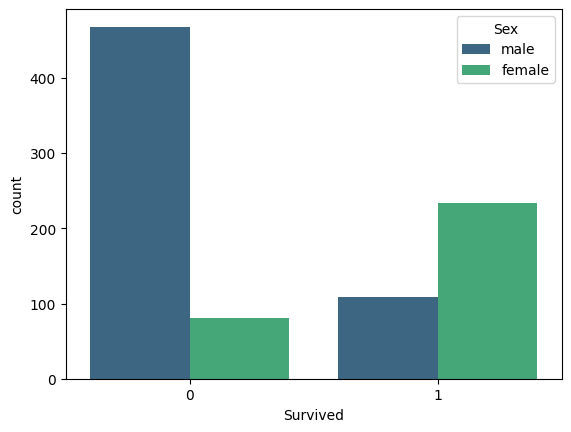

In [20]:
sns.countplot(data= train, x= "Survived", hue= "Sex", palette= "viridis")

In [21]:
train.groupby("Pclass").Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [22]:
train[["Pclass", "Survived"]].groupby(["Pclass"],as_index= False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Survived', ylabel='count'>

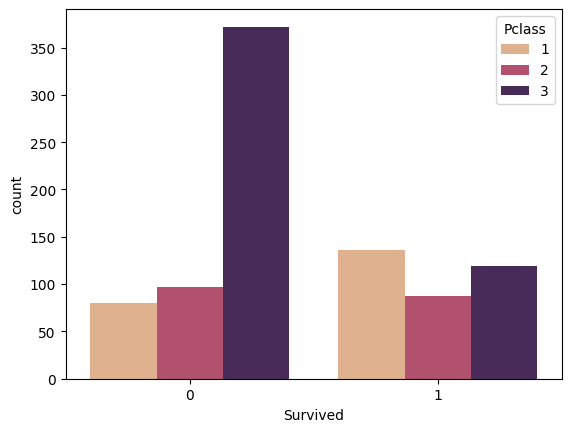

In [23]:
sns.countplot(data= train, x= "Survived", hue= "Pclass", palette= "flare")

C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\198178001.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= train, x= "Pclass", palette= "rainbow")
C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\198178001.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= test, x= "Pclass", palette= "rainbow")


Text(0.5, 1.0, 'Test Dataset')

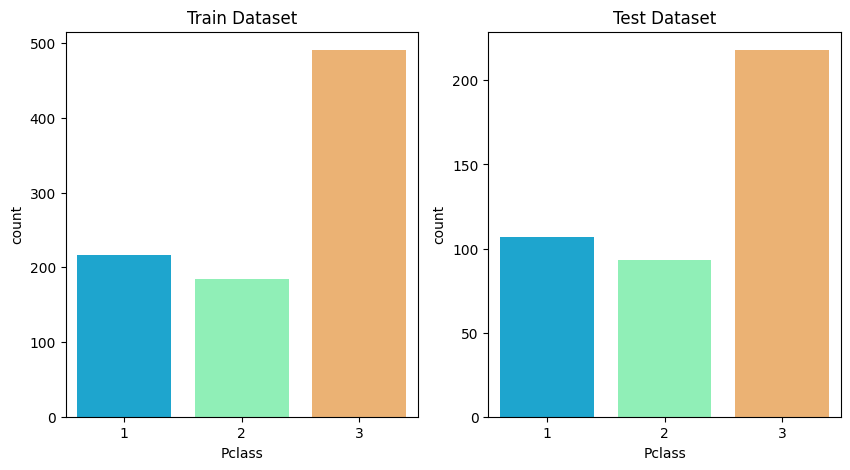

In [24]:
plt.figure(figsize= (10, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= train, x= "Pclass", palette= "rainbow")
plt.title("Train Dataset")

plt.subplot(1, 2, 2)
sns.countplot(data= test, x= "Pclass", palette= "rainbow")
plt.title("Test Dataset")

Text(0.5, 1.0, 'Test Dataset')

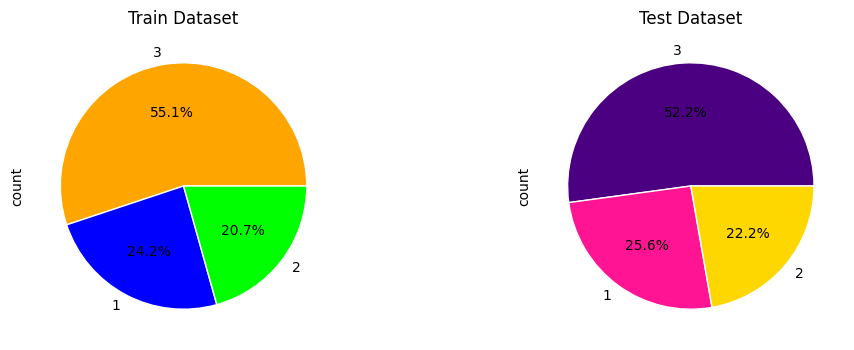

In [25]:
plt.figure(figsize= (12, 4))

plt.subplot(1, 2, 1)
plt_1 = train["Pclass"].value_counts().plot(kind= "pie",
                                            autopct= "%1.1f%%",
                                            colors= ["orange", "b", "lime"],
                                            wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("Train Dataset")

plt.subplot(1, 2, 2)
plt_2 = test["Pclass"].value_counts().plot(kind= "pie",
                                           autopct= "%1.1f%%",
                                           colors= ["indigo", "deeppink", "gold"],
                                           wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("Test Dataset")

In [26]:
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
test["Sex"].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\3112436242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= train, x= "Sex", palette= "dark")
C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\3112436242.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= test, x= "Sex", palette= "dark")


Text(0.5, 1.0, 'Test Dataset')

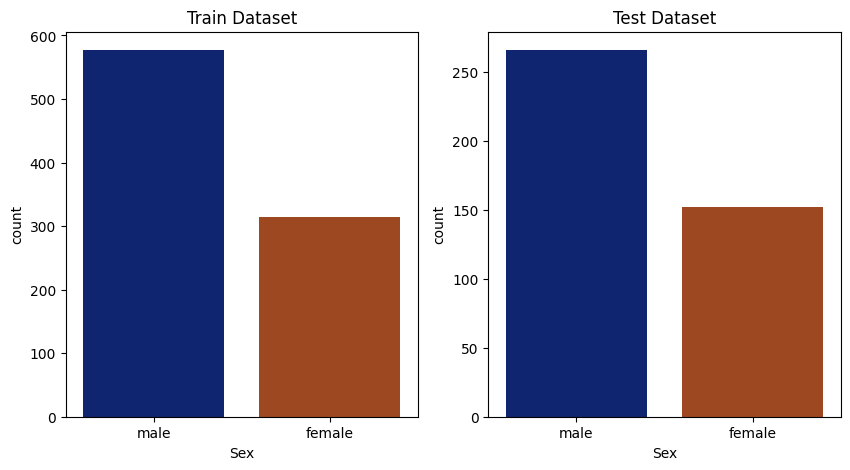

In [28]:
plt.figure(figsize= (10, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= train, x= "Sex", palette= "dark")
plt.title("Train Dataset")

plt.subplot(1, 2, 2)
sns.countplot(data= test, x= "Sex", palette= "dark")
plt.title("Test Dataset")

Text(0.5, 1.0, 'Test Dataset')

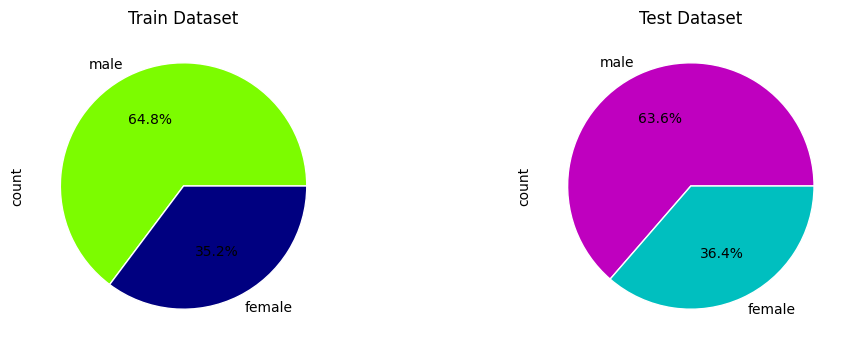

In [29]:
plt.figure(figsize= (12, 4))

plt.subplot(1, 2, 1)
plt_1 = train["Sex"].value_counts().plot(kind= "pie",
                                         autopct= "%1.1f%%",
                                         colors= ["lawngreen", "navy"],
                                         wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("Train Dataset")

plt.subplot(1, 2, 2)
plt_2 = test["Sex"].value_counts().plot(kind= "pie",
                                        autopct= "%1.1f%%",
                                        colors= ["m", "c"],
                                        wedgeprops= {"linewidth": 1, "edgecolor": "white"})
plt.title("Test Dataset")

Text(0.5, 1.0, 'Test Dataset')

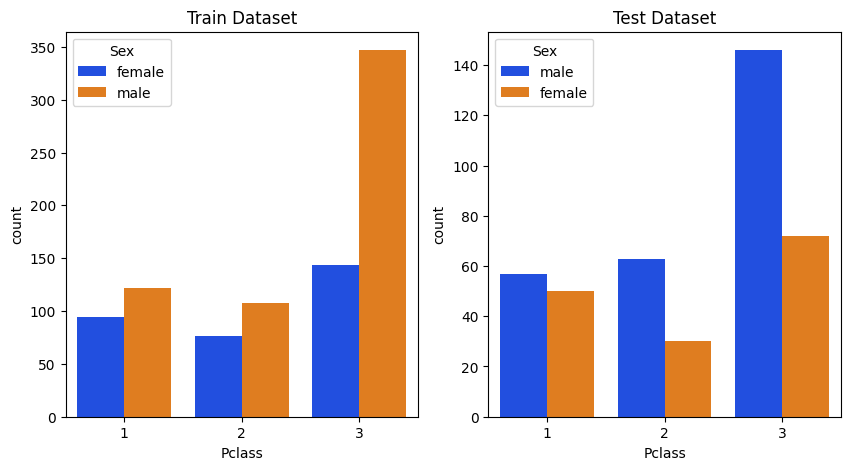

In [30]:
plt.figure(figsize= (10, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= train, x= "Pclass", hue= "Sex", palette= "bright")
plt.title("Train Dataset")

plt.subplot(1, 2, 2)
sns.countplot(data= test, x= "Pclass", hue= "Sex", palette= "bright")
plt.title("Test Dataset")

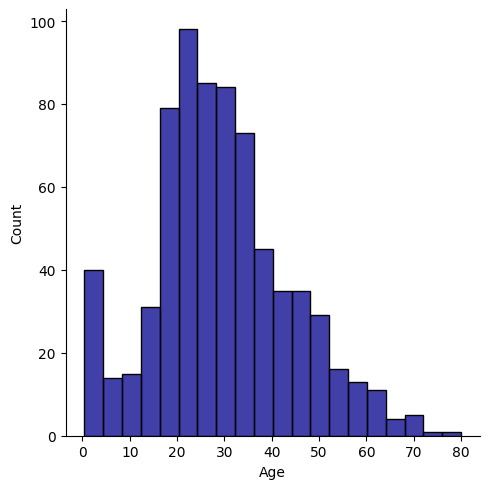

In [31]:
sns.displot(data= train["Age"].dropna(), bins= 20, color= "darkblue")

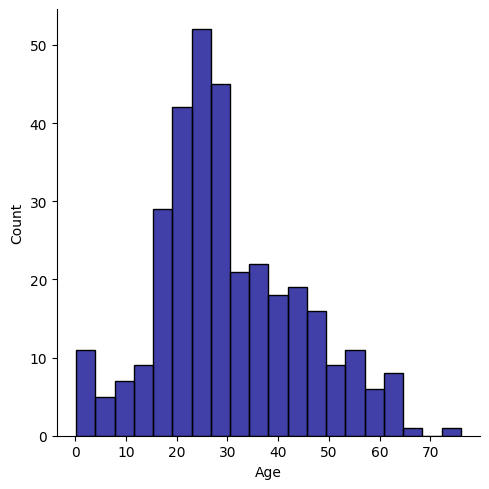

In [32]:
sns.displot(data= test["Age"].dropna(), bins= 20, color= "darkblue")

C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\713560824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= train, x= "SibSp", palette= "Spectral")
C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\713560824.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= test, x= "SibSp", palette= "Spectral")


Text(0.5, 1.0, 'Test Dataset')

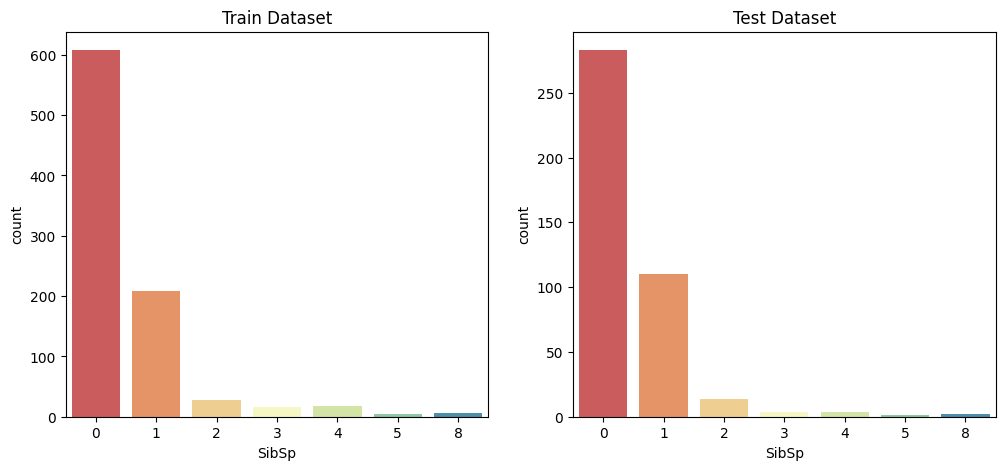

In [33]:
plt.figure(figsize= (12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data= train, x= "SibSp", palette= "Spectral")
plt.title("Train Dataset")

plt.subplot(1, 2, 2)
sns.countplot(data= test, x= "SibSp", palette= "Spectral")
plt.title("Test Dataset")

C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\1373910515.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= train, x= "Pclass", y= "Age", palette= "viridis")
C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\1373910515.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= test, x= "Pclass", y= "Age", palette= "viridis")


Text(0.5, 1.0, 'Test Dataset')

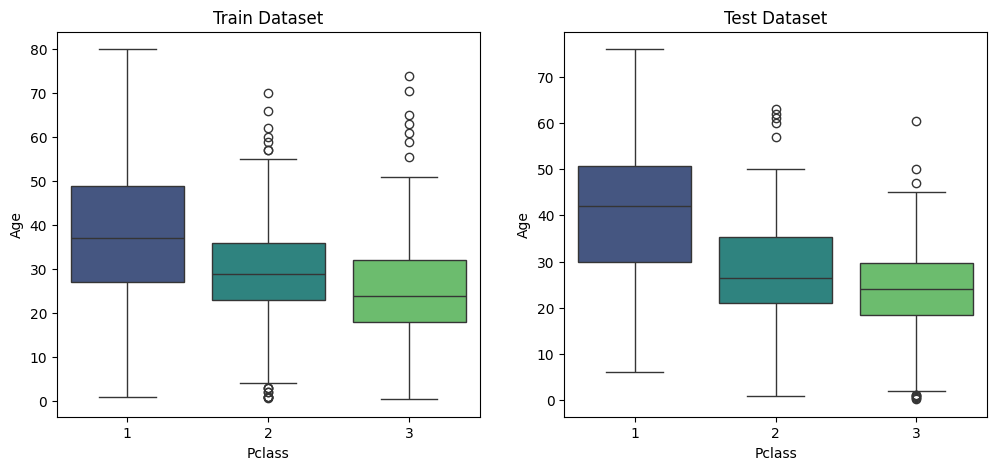

In [34]:
plt.figure(figsize= (12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data= train, x= "Pclass", y= "Age", palette= "viridis")
plt.title("Train Dataset")

plt.subplot(1, 2, 2)
sns.boxplot(data= test, x= "Pclass", y= "Age", palette= "viridis")
plt.title("Test Dataset")

In [35]:
train.groupby("Embarked").Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

In [36]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [37]:
test["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [38]:
train["Embarked"] = train["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].fillna("S")

In [39]:
print("Average Age of class = 1 in train is : ", train[train["Pclass"] == 1]["Age"].mean())
print("Round Average Age of class = 1 in train is : ", np.round(train[train["Pclass"] == 1]["Age"].mean()))

print("Average Age of class = 1 in test is : ", test[test["Pclass"] == 1]["Age"].mean())
print("Round Average Age of class = 1 in test is : ", np.round(test[test["Pclass"] == 1]["Age"].mean()))

print("**********************************************************************")

print("Average Age of class = 2 in train is : ", train[train["Pclass"] == 2]["Age"].mean())
print("Round Average Age of class = 2 in train is : ", np.round(train[train["Pclass"] == 2]["Age"].mean()))

print("Average Age of class = 2 in test is : ", test[test["Pclass"] == 2]["Age"].mean())
print("Round Average Age of class = 2 in test is : ", np.round(test[test["Pclass"] == 2]["Age"].mean()))

print("**********************************************************************")

print("Average Age of class = 3 in train is : ", train[train["Pclass"] == 3]["Age"].mean())
print("Round Average Age of class = 3 in train is : ", np.round(train[train["Pclass"] == 3]["Age"].mean()))

print("Average Age of class = 3 in test is : ", test[test["Pclass"] == 3]["Age"].mean())
print("Round Average Age of class = 3 in test is : ", np.round(test[test["Pclass"] == 3]["Age"].mean()))

Average Age of class = 1 in train is :  38.233440860215055
Round Average Age of class = 1 in train is :  38.0
Average Age of class = 1 in test is :  40.91836734693877
Round Average Age of class = 1 in test is :  41.0
**********************************************************************
Average Age of class = 2 in train is :  29.87763005780347
Round Average Age of class = 2 in train is :  30.0
Average Age of class = 2 in test is :  28.7775
Round Average Age of class = 2 in test is :  29.0
**********************************************************************
Average Age of class = 3 in train is :  25.14061971830986
Round Average Age of class = 3 in train is :  25.0
Average Age of class = 3 in test is :  24.02794520547945
Round Average Age of class = 3 in test is :  24.0


In [40]:
def Fillna_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
            
        elif Pclass == 2:
            return 29
            
        else:
            return 25
            
    else:
        return Age

In [41]:
train["Age"] = train[["Age", "Pclass"]].apply(Fillna_age, axis= 1)
test["Age"] = test[["Age", "Pclass"]].apply(Fillna_age, axis= 1)

C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\1033859993.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\1033859993.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]
C:\Users\Hediye\AppData\Local\Temp\ipykernel_11748\1033859993.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Hediye\AppData\Local\Temp\ipykernel_1174

In [42]:
test["Fare"].replace(np.nan, test["Fare"].mean(), inplace= True)

Text(0.5, 1.0, 'Test Dataset')

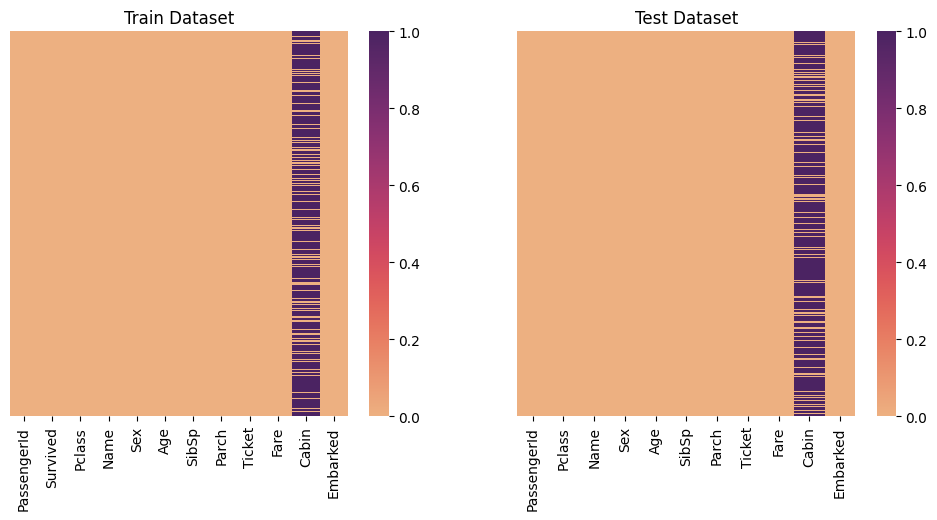

In [43]:
plt.figure(figsize= (12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train.isnull(), yticklabels= False, cbar= True, cmap= "flare")
plt.title("Train Dataset")

plt.subplot(1, 2, 2)
sns.heatmap(test.isnull(), yticklabels= False, cbar= True, cmap= "flare")
plt.title("Test Dataset")

In [44]:
# train.drop("Cabin", axis= 1, inplace= True)
# test.drop("Cabin", axis= 1, inplace= True)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [48]:
col_category = ["Sex", "Embarked"]

en = LabelEncoder()

for col in col_category:
    train[col] = en.fit_transform(train[col])
    test[col] = en.fit_transform(test[col])

In [49]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
columns_drop = ["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"]

train = train.drop(columns_drop, axis= 1)
test = test.drop(columns_drop, axis= 1)

In [52]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [53]:
test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,34.5,7.8292,1
1,3,0,47.0,7.0000,2
2,2,1,62.0,9.6875,1
3,3,1,27.0,8.6625,2
4,3,0,22.0,12.2875,2


In [54]:
X_train = train.drop("Survived", axis= 1)
y_train = train["Survived"]
X_test = test

**Logistic Regression**

In [55]:
log = LogisticRegression()

In [56]:
log.fit(X_train, y_train)

LogisticRegression()

In [57]:
prediction_log = log.predict(X_test)
acc_log = round(log.score(X_train, y_train) * 100, 2)
print(str(acc_log))

79.12


**Support Vector Machine (SVM)**

In [58]:
svm = SVC()

In [59]:
svm.fit(X_train, y_train)

SVC()

In [60]:
prediction_svm = svm.predict(X_test)
acc_svm = round(svm.score(X_train, y_train) * 100, 2)
print(str(acc_svm))

68.01


**Linear SVM**

In [61]:
svm_lr = LinearSVC()

In [62]:
svm_lr.fit(X_train, y_train)

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [63]:
prediction_svm_lr = svm_lr.predict(X_test)
acc_svm_lr = round(svm_lr.score(X_train, y_train) * 100, 2)
print(str(acc_svm_lr))

79.24


**k-Nearest Neighbors (KNN)**

In [64]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [65]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
prediction_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(str(acc_knn))

84.74


**Decision Tree**

In [67]:
DT = DecisionTreeClassifier()

In [68]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
prediction_DT = DT.predict(X_test)
acc_DT = round(DT.score(X_train, y_train) * 100, 2)
print(str(acc_DT))

97.98


**Random Forest**

In [70]:
rfc = RandomForestClassifier(n_estimators=100)

In [71]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
prediction_rfc = rfc.predict(X_test)
acc_rfc = round(rfc.score(X_train, y_train) * 100, 2)
print (str(acc_rfc))

97.98


**Gaussian Naive Bayes**

In [73]:
NB = GaussianNB()

In [74]:
NB.fit(X_train, y_train)

GaussianNB()

In [75]:
prediction_NB = NB.predict(X_test)
acc_NB = round(NB.score(X_train, y_train) * 100, 2)
print(str(acc_NB))

78.11


**Perceptron**

In [76]:
perceptron = Perceptron(max_iter = 5, tol = None)

In [77]:
perceptron.fit(X_train, y_train)

Perceptron(max_iter=5, tol=None)

In [78]:
pred_perceptron = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(str(acc_perceptron))

39.96


**Stochastic Gradient Descent (SGD)**

In [79]:
sgd = SGDClassifier(max_iter= 5, tol= None)

In [80]:
sgd.fit(X_train, y_train)

SGDClassifier(max_iter=5, tol=None)

In [81]:
prediction_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print (str(acc_sgd))

67.23


In [82]:
models = pd.DataFrame({
    "Model": ["Logistic Regression", "Support Vector Machines", "Linear SVC", "KNN", "Decision Tree", "Random Forest", "Naive Bayes", 
              "Perceptron", "Stochastic Gradient Decent"],
    
    "Score": [acc_log, acc_svm, acc_svm_lr, 
              acc_knn,  acc_DT, acc_rfc, acc_NB, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by= "Score", ascending= False)

,Model,Score
4,Decision Tree,97.98
5,Random Forest,97.98
3,KNN,84.74
2,Linear SVC,79.24
0,Logistic Regression,79.12
6,Naive Bayes,78.11
1,Support Vector Machines,68.01
8,Stochastic Gradient Decent,67.23
7,Perceptron,39.96
